# New Phone In Market

## Introduction

#### Over the last two decades, we have had an enormous increase in the use of mobile phones. It is said that the number of mobile phone users will increase to 7.33 billion by 2023 (Marko, 2021). However, we also know that the prices of these mobile phones have also increased significantly. How can we assume how much the price of our phone is going to be? How will rising phone companies know how much to set their phone prices for?<br><br> By using a dataset containing price ranges and the variables of a mobile phone, **based on memory, power, phone height, phone width and pixels, can we predict the price range of the phone (on a scale of 0-3)?** This dataset has provided us with a wide range of variables on phone components such as RAM, power and pixels, as well as a price range of 0 to 3 of each phone, 0 being the lowest cost and 3 being the highest. Dataset from: https://www.kaggle.com/iabhishekofficial/mobile-price-classification 

## Preliminary exploratory data analysis

### Importing libraries and read dataset

We use tidyverse to read, tidy, manipulate, visual data and so on. We use tidymodels package to predict the class of a test dataset. And repr is used to resize plots. 

In [2]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'tune':
  method                   from   
  required_pkgs.model_spec parsnip

── Attaching packages ────────────────────────────────────── tidymodels 0.1.4 ──

✔ broom        0.7.12     ✔ rsample      0.1.1 
✔ dials        0.1.0      ✔ tune         0.1.6 
✔ infer        1.0.0      ✔ workflows    0.2.4 
✔ modeldata    0.1.1      ✔ workflowsets 0.1.0 
✔ parsnip      0.1.7      ✔ yardstick    0.0.9 
✔ recipes      0.2.0      

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks

In [3]:
mobile <- read_csv("https://raw.githubusercontent.com/ClaireJ2100/dsci100_project/main/data/mobile.csv")

glimpse(mobile)

Rows: 2000 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (21): battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 2,000
Columns: 21
$ battery_power <dbl> 842, 1021, 563, 615, 1821, 1859, 1821, 1954, 1445, 509, …
$ blue          <dbl> 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,…
$ clock_speed   <dbl> 2.2, 0.5, 0.5, 2.5, 1.2, 0.5, 1.7, 0.5, 0.5, 0.6, 2.9, 2…
$ dual_sim      <dbl> 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,…
$ fc            <dbl> 1, 0, 2, 0, 13, 3, 4, 0, 0, 2, 0, 5, 2, 7, 13, 3, 1, 7, …
$ four_g        <dbl> 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,…
$ int_memory    <dbl> 7, 53, 41, 10, 44, 22, 10, 24, 53, 9, 9, 33, 33, 17, 52,…
$ m_dep         <dbl> 0.6, 0.7, 0.9, 0.8, 0.6, 0.7, 0.8, 0.8, 0.7, 0.1, 0.1, 0…
$ mobile_wt     <dbl> 188, 136, 145, 131, 141, 164, 139, 187, 174, 93, 182, 17…
$ n_cores       <dbl> 2, 3, 5, 6, 2, 1, 8, 4, 7, 5, 5, 8, 4, 4, 1, 2, 8, 3, 5,…
$ pc            <dbl> 2, 6, 6, 9, 14, 7, 10, 0, 14, 15, 1, 18, 17, 11, 17, 16,…
$ px_height     <dbl> 20, 905, 1263, 1216, 1208, 1004, 381, 512, 386, 1137, 24…
$ px_width      

### Cleaning and wrangling
We want to use price range(price_range), memory(ram), power(battery_power), phone size(sc_h * sc_w) and pixels(fc) as variables. 

In [4]:
mobile <- mobile %>%
    mutate(phone_size = sc_h * sc_w) %>%
    select(price_range, battery_power, ram, phone_size, fc)

mobile

price_range,battery_power,ram,phone_size,fc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,842,2549,63,1
2,1021,2631,51,0
2,563,2603,22,2
⋮,⋮,⋮,⋮,⋮
3,1911,3057,9,1
0,1512,869,180,4
3,510,3919,76,5


### Create the train / test split
We split the data into training and testing datasets and only use the training dataset to create our classification model. To make sure that this process is replicable, we use set.seed().

In [5]:
set.seed(1234)
mobile_split <- initial_split(mobile, prop = 0.75, strata = price_range)
mobile_train <- training(mobile_split)
mobile_test <- testing(mobile_split)

glimpse(mobile_train)
glimpse(mobile_test)

Rows: 1,500
Columns: 5
$ price_range   <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ battery_power <dbl> 1445, 509, 1866, 1602, 1195, 823, 799, 1156, 1242, 605, …
$ ram           <dbl> 1099, 513, 373, 1037, 504, 905, 431, 470, 1050, 392, 590…
$ phone_size    <dbl> 17, 190, 126, 56, 27, 154, 90, 0, 11, 90, 18, 70, 77, 0,…
$ fc            <dbl> 0, 2, 13, 4, 1, 13, 1, 0, 0, 8, 4, 4, 1, 4, 0, 11, 0, 1,…
Rows: 500
Columns: 5
$ price_range   <dbl> 2, 3, 0, 0, 3, 1, 3, 1, 2, 0, 3, 0, 3, 0, 1, 3, 1, 0, 1,…
$ battery_power <dbl> 1021, 1821, 1954, 775, 838, 1131, 1709, 503, 961, 851, 1…
$ ram           <dbl> 2631, 3220, 700, 568, 3554, 1835, 3283, 2583, 2782, 478,…
$ phone_size    <dbl> 51, 104, 48, 255, 90, 247, 17, 0, 162, 84, 187, 5, 0, 12…
$ fc            <dbl> 0, 4, 0, 3, 1, 11, 1, 5, 0, 3, 0, 16, 0, 0, 16, 6, 3, 2,…


### Summarize the data
'Summary' can summarize the data. 'Dim' can return the rows and columns. 'Colsums' can return how many rows have missing data.

In [6]:
summary(mobile_train)

dim(mobile_train)

colSums(sapply(mobile_train, is.na))

  price_range   battery_power         ram         phone_size    
 Min.   :0.00   Min.   : 501.0   Min.   : 256   Min.   :  0.00  
 1st Qu.:0.75   1st Qu.: 857.8   1st Qu.:1204   1st Qu.: 20.00  
 Median :1.50   Median :1225.0   Median :2124   Median : 54.00  
 Mean   :1.50   Mean   :1236.2   Mean   :2120   Mean   : 80.46  
 3rd Qu.:2.25   3rd Qu.:1615.2   3rd Qu.:3040   3rd Qu.:120.00  
 Max.   :3.00   Max.   :1997.0   Max.   :3998   Max.   :342.00  
       fc        
 Min.   : 0.000  
 1st Qu.: 1.000  
 Median : 3.000  
 Mean   : 4.329  
 3rd Qu.: 7.000  
 Max.   :19.000  

[1] 1500    5

price_range battery_power           ram    phone_size            fc 
            0             0             0             0             0

### Visualize the data
'Ggpairs' can show the correlation between all the variables. <br>

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



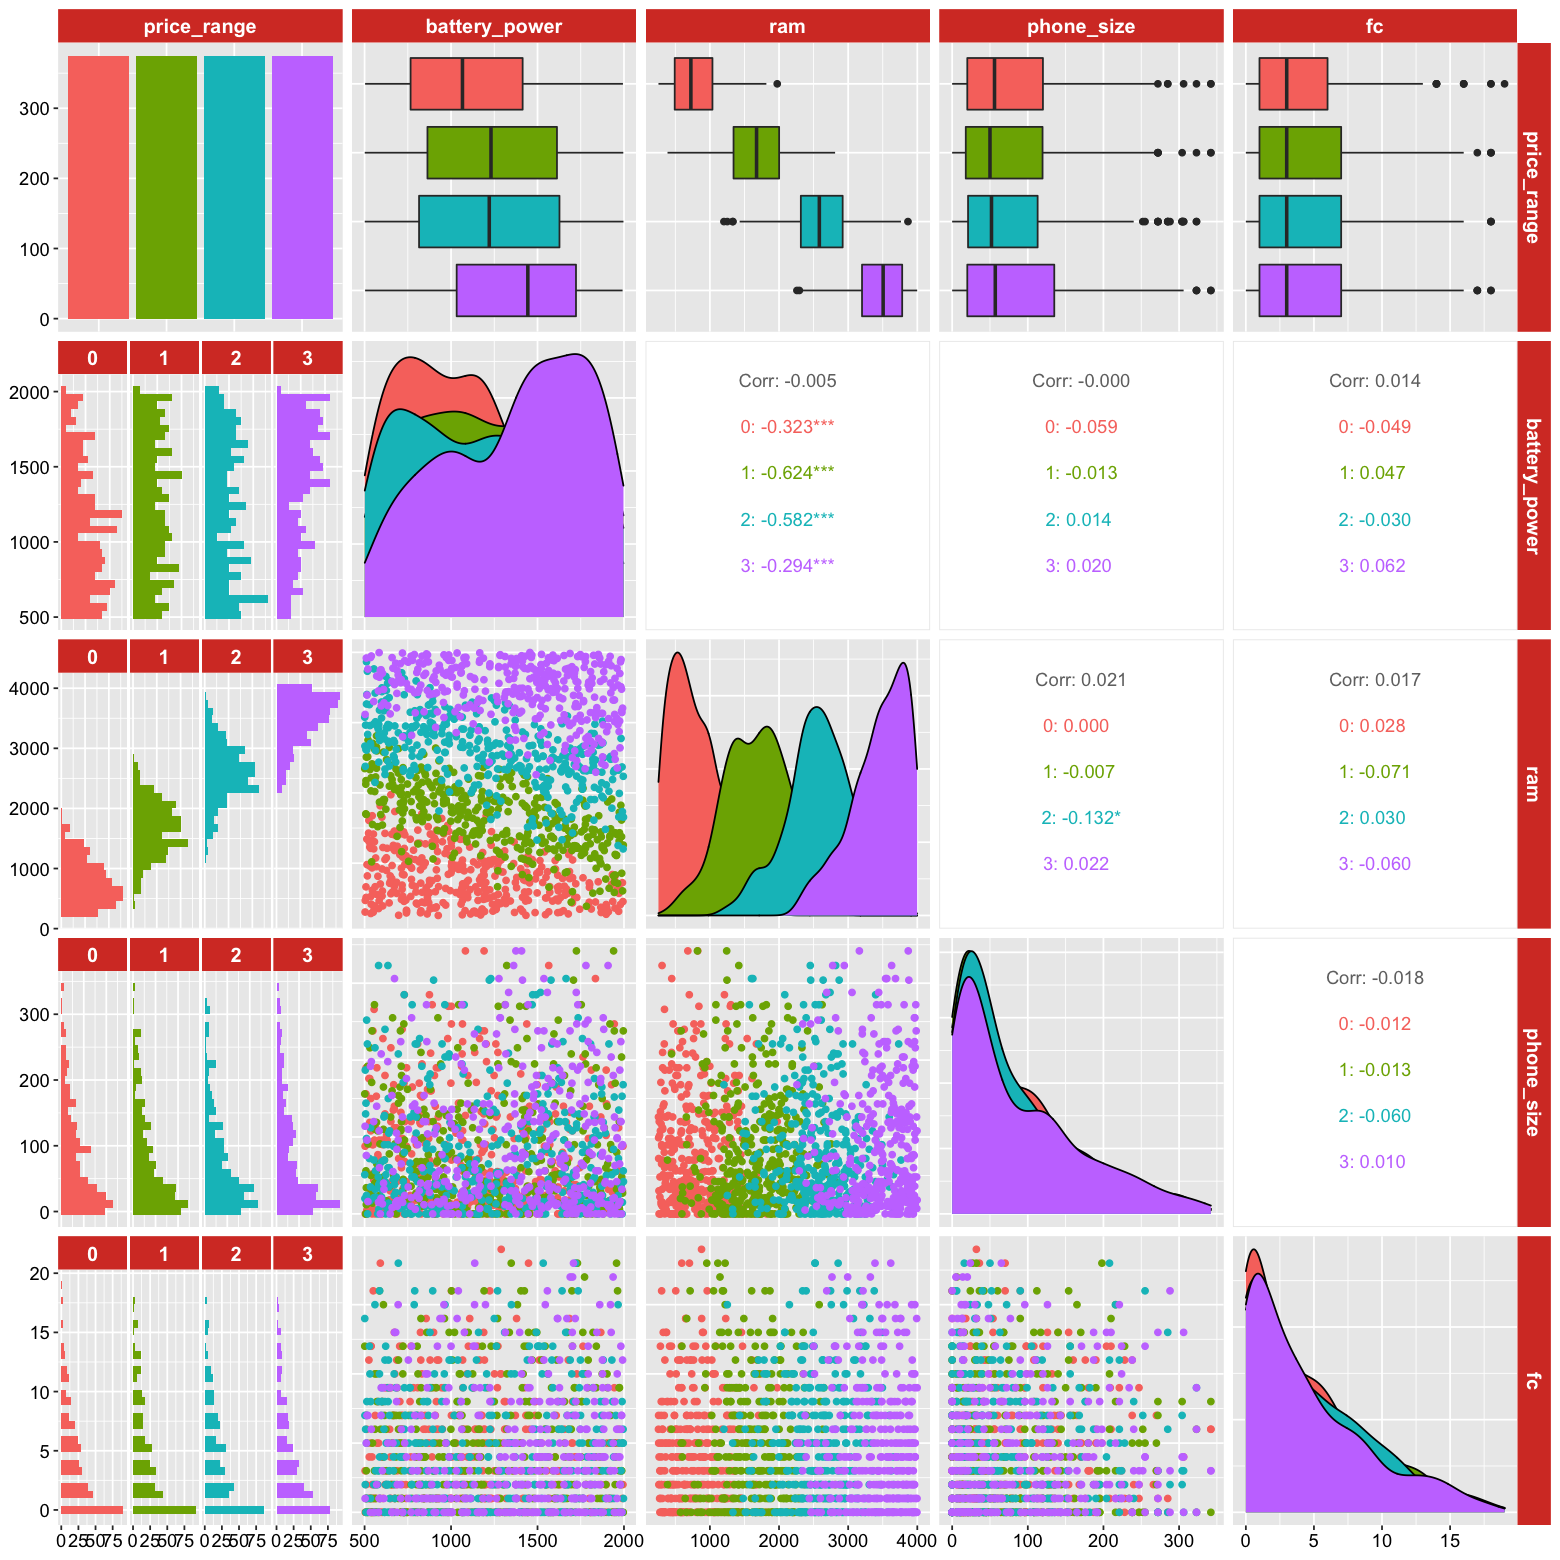

In [7]:
library(GGally)
library(ggplot2)
options(repr.plot.width = 13, repr.plot.height = 13)

mobile_train$price_range <- as.factor(mobile_train$price_range)

ggpairs(mobile_train, showStrips = T, ggplot2 :: aes(color = price_range)) +
    theme(axis.text = element_text(color = "black", size = 11),
             strip.background = element_rect(fill = "#d63d2d"),
             strip.text= element_text(colour= "white", size = 12, face = "bold"))

We use bar plots because it’s simple and splits each individual measurement into different bars that can be distinguished and compared easily.

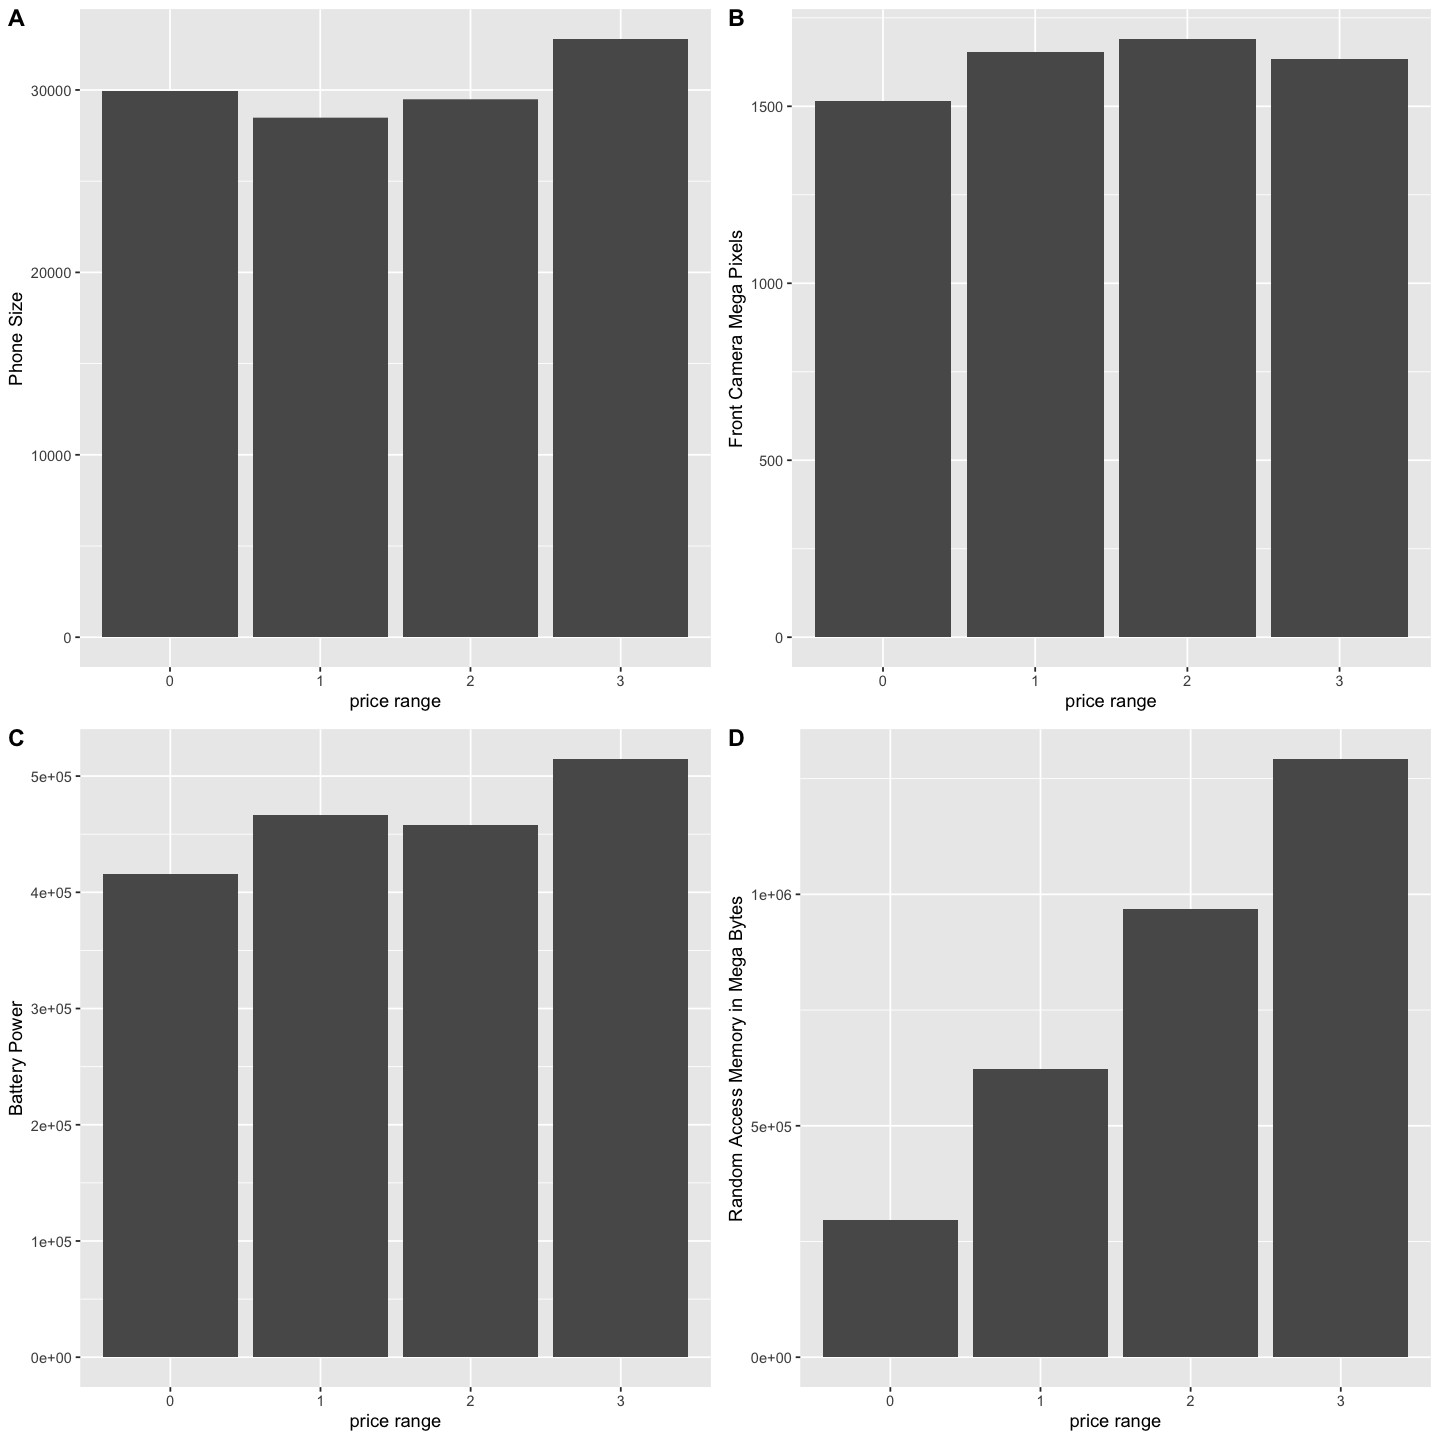

In [8]:
options(repr.plot.width = 12, repr.plot.height = 12)

g1 <- ggplot(mobile_train, aes(x = price_range, y = phone_size)) +
        geom_bar(stat = "identity") + 
        labs(x = "price range", y = "Phone Size")

g2 <- ggplot(mobile_train, aes(x = price_range, y = fc)) +
        geom_bar(stat = "identity") +
        labs(x = "price range", y = "Front Camera Mega Pixels")

g3 <- ggplot(mobile_train, aes(x = price_range, y = battery_power)) +
        geom_bar(stat = "identity") +
        labs(x = "price range", y = "Battery Power")

g4 <- ggplot(mobile_train, aes(x = price_range, y = ram)) +
       geom_bar(stat = "identity") +
       labs(x = "price range", y = "Random Access Memory in Mega Bytes")


cowplot::plot_grid(g1, g2, g3, g4, labels = "AUTO" , nrow = 2, ncol = 2)

### Methods


#### We plan to conduct our data analysis by focusing on the 5 variables, memory, power, phone height, phone width and pixels to predict the price range of the phone whether it be very affordable or expensive.
#### The reason why we are using these variables is because the other predictors were either categorical, such as bluetooth and wifi,  or have the same effect as the ones we are utilizing right now.
#### Firstly, we will clean, wrangle and standardize our data set. We will then split it into a training set and testing set where we will create our recipe and workflow to help our predictions based on the variables above. Moreover, we will evaluate classification accuracy using a validation data set and appropriate metrics. And we will excecute cross-validation in R to choose the number of neighbors in K-nearest neighours classifier.   
#### To visualize our results we will use scatter plots so that we can observe the proximity of our predicted data value to those of others and estimate its price range visually. 

### Expected outcomes and significance
#### Based on the classification of the data set we expect to find the estimated price range that corresponds to the parameters of the phone model described. It is important to consumers who are looking for certain qualities in their phone to compare the pros and cons in the phone’s quality versus the actual cost so they can come to a decision on which phone is best for them.  Additional inquiries regarding these findings would be the change in price that would lead to a different quality phone, or vice versa with the other way around and how these qualities might further improve in the future.


### Classification
We will perform K-nearest neighbors classification.

### Reference
M., M. (2022, January 23). 29+ Smartphone Usage Statistics: Around the World in 2022. Leftronic. https://leftronic.com/blog/smartphone-usage-statistics/#:%7E:text=11.-,Mobile%20owners%20worldwide%20will%20increase%20to%207.33%20billion%20by%202023,of%20the%20next%20four%20years.<br> 

Sharma, A. (2018, January 28). Mobile price classification. Kaggle. Retrieved March 10, 2022, from https://www.kaggle.com/iabhishekofficial/mobile-price-classification 